In [45]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Linear regression in one dimension
class linear_regression_1D:
    
    # Class constructor
    def __init__(self):
        # Define the vector w (the slop of the line)
        # w is the two diemensional vector becuase we must absorb b into w
        self.w = np.zeros(2)
        # Define the learning rate
        self.alpha = 1

    # Class function to set the learning rate
    def set_learning_rate(self, alpha):
        self.alpha = alpha

    # Class function to fit the data (find the appropiate value of w)
    def fit(self, x, y, iteration=1500):
        self.y = y
        # Apply transformation to x. Recall that we must absorb b into w 
        self.x = np.append(x.transpose(), np.ones((x.shape[1], 1)), axis=1)
        # Iteratively make an updage for w by gradient descent
        for i in range(iteration):
            self.make_one_update()

    # Class function to make an update for w
    def make_one_update(self):
        w_current = self.w
        # Set step size 
        step = (-1)*self.alpha*self.compute_gradient(w_current)
        w_update = w_current + step
        
        # Report the progress of convergence
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        if current_loss > update_loss:
            print("Loss decreases to ", update_loss,)
        else:
            print("Loss increases to ", update_loss,)
        self.w = w_update
    
    # Class function to compute the gradient with respect to the current w
    def compute_gradient(self, w_current):
        grad_v = np.zeros(2)
        # Uncomment the following to implement how to compute the gradient vector 
        grad_v[0] = 2 * np.dot(self.x[:, 0], np.dot(self.x, w_current) - self.y)
        grad_v[1] = 2 * np.dot(self.x[:, 1], np.dot(self.x, w_current) - self.y)
        print("The norm of grad vector is ", math.sqrt(np.inner(grad_v, grad_v)))
        return grad_v

    # Class function to compute the square loss function
    def sq_loss(self, w):
        # Uncomment the following to implement how to compute the loss function
        loss = np.sum(np.square(np.dot(self.x, w) - self.y))
        return loss
        

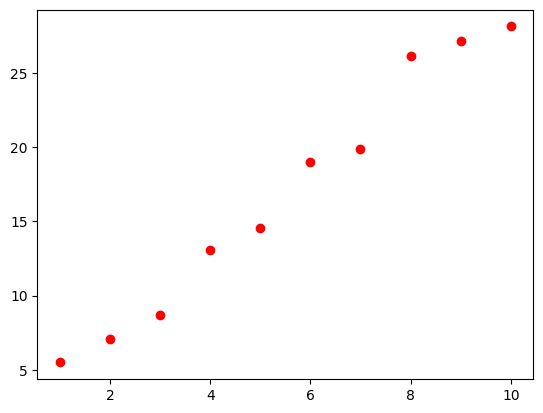

In [46]:
# Create our data set where x is one-dimensional
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
y = np.array([5.5, 7.1, 8.7, 13.1, 14.56, 19.01, 19.85, 26.12, 27.11, 28.112])

# The 2D plot of our data
plt.plot(x.transpose(), y, 'ro')
plt.show()


In [47]:
h = linear_regression_1D()

# You may edit the learning rate if the current setting does not yield convergence
h.set_learning_rate(0.001)

# Uncomment the following to fit the vector w to our data. 
# You may also edit the number of iterations if the current setting does not yield convergence
h.fit(x, y, iteration=1200)

The norm of grad vector is  2340.739258135344
Loss decreases to  176.49887851216
The norm of grad vector is  501.41455471152017
Loss decreases to  23.85191256459594
The norm of grad vector is  107.53824388871456
Loss decreases to  16.81919108027823
The norm of grad vector is  23.653124361778275
Loss decreases to  16.467704758848704
The norm of grad vector is  7.369045470813019
Loss decreases to  16.423004656138197
The norm of grad vector is  5.5574300699444565
Loss decreases to  16.392619834078637
The norm of grad vector is  5.438070212271835
Loss decreases to  16.363129296847855
The norm of grad vector is  5.410767750846712
Loss decreases to  16.333915279377823
The norm of grad vector is  5.387839201766684
Loss decreases to  16.304947463981094
The norm of grad vector is  5.365203275541965
Loss decreases to  16.27622250244629
The norm of grad vector is  5.342671456024481
Loss decreases to  16.247738300364574
The norm of grad vector is  5.3202346765764394
Loss decreases to  16.219492837

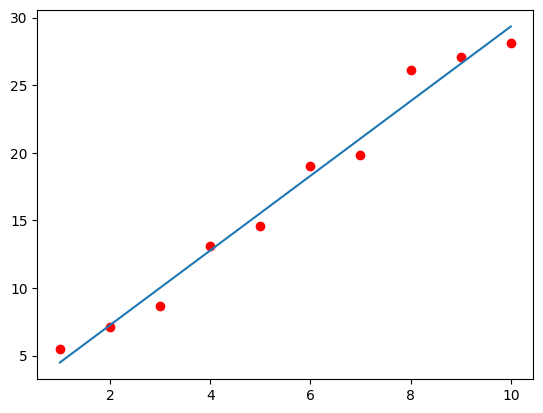

In [48]:
# The following codes is to give a 2D plot our data and the linear function that we learnt from our setting
plt.plot(x.transpose(), y, 'ro')
plt.plot(x.transpose(), x.transpose()*h.w[0]+h.w[1], linestyle='solid')
plt.show()